In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from utils.visualization_utils import perc, SetPlotRC, ApplyFont

import warnings
warnings.filterwarnings("ignore")

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

In [3]:
df_kernel_alternative_proxy = pd.read_pickle(r"../Results/Kernel_Alternative_Proxy_Synthetic_Experiment1.pkl")
df_kernel_negative_control = pd.read_pickle(r"../Results/Kernel_Negative_Control_Synthetic_Experiment1.pkl")
df_PKIPW = pd.read_pickle(r"../Results/PKIPW_Synthetic_Experiment1.pkl")
df_PMMR = pd.read_pickle(r"../Results/PMMR_Synthetic_Experiment1_V2.pkl")
df_KPV = pd.read_pickle(r"../Results/KPV_Synthetic_Experiment1_V2.pkl")

relevant_columns = ['Algorithm', 'Data_Size', 'Seed', 'Causal_MSE', 'Causal_MAE', 'scale_data', 'Algo_Run_Time']

In [4]:
df_kernel_negative_control.shape, df_kernel_alternative_proxy.shape, df_PKIPW.shape, df_PMMR.shape, df_KPV.shape

((180, 7), (720, 11), (180, 7), (180, 7), (180, 7))

In [5]:
df_kernel_alternative_proxy_results_wrt_data_scale = pd.DataFrame(columns = ['Algorithm', 'scale_data', 'eta_parameter', 'sigma_square', 'stage1_perc', 'Data_Size', 'Causal_MSE_mean', 'Causal_MSE_std'])

for scale_data in df_kernel_alternative_proxy["scale_data"].unique():
    for eta_parameter in df_kernel_alternative_proxy["eta_parameter"].unique():
        for data_size_ in df_kernel_alternative_proxy["Data_Size"].unique():
            for stage1_perc in df_kernel_alternative_proxy["stage1_perc"].unique():
                for sigma_sq in df_kernel_alternative_proxy["sigma_square"].unique():
                    df_scale = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy['eta_parameter'] == eta_parameter) & (df_kernel_alternative_proxy['scale_data'] == scale_data) & (df_kernel_alternative_proxy['Data_Size'] == data_size_) & (df_kernel_alternative_proxy['stage1_perc'] == stage1_perc) & (df_kernel_alternative_proxy['sigma_square'] == sigma_sq)]
            
                    df_scale_dict = {
                        "Algorithm" : "Kernel_Alternative_Proxy",
                        "eta_parameter" : eta_parameter,
                        "sigma_square": sigma_sq,
                        "scale_data" : scale_data,
                        "stage1_perc" : stage1_perc,
                        "Data_Size" : data_size_, 
                        "Causal_MSE_mean" : df_scale["Causal_MSE"].mean(),
                        "Causal_MSE_std" : df_scale["Causal_MSE"].std(),
                    }
                
                    df_kernel_alternative_proxy_results_wrt_data_scale = pd.concat([df_kernel_alternative_proxy_results_wrt_data_scale, pd.DataFrame([df_scale_dict])], ignore_index = True)
        
df_kernel_alternative_proxy_results_wrt_data_scale#.loc[df_kernel_alternative_proxy_results_wrt_data_scale["Data_Size"] == 500]

,Algorithm,scale_data,eta_parameter,sigma_square,stage1_perc,Data_Size,Causal_MSE_mean,Causal_MSE_std
0,Kernel_Alternative_Proxy,True,learned,0.0,0.50,500,0.208906,0.163709
1,Kernel_Alternative_Proxy,True,learned,1.0,0.50,500,0.116008,0.068571
2,Kernel_Alternative_Proxy,True,learned,2.0,0.50,500,0.126023,0.046385
3,Kernel_Alternative_Proxy,True,learned,3.0,0.50,500,0.164220,0.043609
4,Kernel_Alternative_Proxy,True,learned,0.0,0.75,500,0.178238,0.107407
5,Kernel_Alternative_Proxy,True,learned,1.0,0.75,500,0.124588,0.054801
6,Kernel_Alternative_Proxy,True,learned,2.0,0.75,500,0.202621,0.056483
7,Kernel_Alternative_Proxy,True,learned,3.0,0.75,500,0.277770,0.061316
8,Kernel_Alternative_Proxy,True,learned,0.0,0.50,1000,0.131006,0.126749
9,Kernel_Alternative_Proxy,True,learned,1.0,0.50,1000,0.069766,0.039968


In [6]:
df_kernel_negative_control_results_wrt_data_scale = pd.DataFrame(columns = ['Algorithm', "scale_data", "Data_Size", "Causal_MSE_mean", "Causal_MSE_std"])

for scale_data in df_kernel_negative_control["scale_data"].unique():
    for data_size in df_kernel_negative_control["Data_Size"].unique():
        df_scale = df_kernel_negative_control.loc[(df_kernel_negative_control["scale_data"] == scale_data) & (df_kernel_negative_control["Data_Size"] == data_size)]
        df_scale_dict = {"Algorithm" : "Kernel_Negative_Control",
                            "scale_data" : scale_data,
                            "Data_Size" : data_size, 
                            "Causal_MSE_mean" : df_scale["Causal_MSE"].mean(),
                            "Causal_MSE_std" : df_scale["Causal_MSE"].std()}
        df_kernel_negative_control_results_wrt_data_scale = pd.concat([df_kernel_negative_control_results_wrt_data_scale, pd.DataFrame([df_scale_dict])], ignore_index = True)

df_kernel_negative_control_results = df_kernel_negative_control.loc[df_kernel_negative_control["scale_data"] == True][relevant_columns]

df_kernel_negative_control_results_wrt_data_scale


,Algorithm,scale_data,Data_Size,Causal_MSE_mean,Causal_MSE_std
0,Kernel_Negative_Control,True,500,0.156507,0.065148
1,Kernel_Negative_Control,True,1000,0.166850,0.058717
2,Kernel_Negative_Control,True,2000,0.149551,0.044237
3,Kernel_Negative_Control,False,500,0.164298,0.068651
4,Kernel_Negative_Control,False,1000,0.178839,0.065128
5,Kernel_Negative_Control,False,2000,0.161009,0.049415


In [7]:
df_PKIPW_results_wrt_data_size = pd.DataFrame(columns = ["Algorithm", "Data_Size", "scale_data", "Causal_MSE_mean", "Causal_MSE_std", "Causal_MAE_mean", "Causal_MAE_std"])

for data_size_ in df_PKIPW["Data_Size"].unique():
    for scale_data in df_PKIPW["scale_data"].unique():
        df_data_size = df_PKIPW.loc[(df_PKIPW["Data_Size"] == data_size_) & (df_PKIPW["scale_data"] == scale_data)]
        df_data_size_dict = {"Algorithm" : "PKIPW",
                             "Data_Size" : data_size_,
                             "scale_data" : scale_data,
                             "Causal_MSE_mean" : df_data_size["Causal_MSE"].mean(),
                             "Causal_MSE_std" : df_data_size["Causal_MSE"].std(),
                             "Causal_MAE_mean" : df_data_size["Causal_MAE"].mean(),
                             "Causal_MAE_std" : df_data_size["Causal_MAE"].std(),
                            }
        df_PKIPW_results_wrt_data_size = pd.concat([df_PKIPW_results_wrt_data_size, pd.DataFrame([df_data_size_dict])], ignore_index = True)

df_PKIPW_results_wrt_data_size

,Algorithm,Data_Size,scale_data,Causal_MSE_mean,Causal_MSE_std,Causal_MAE_mean,Causal_MAE_std
0,PKIPW,500,True,0.116705,0.058348,0.273260,0.076466
1,PKIPW,500,False,0.112443,0.049646,0.269617,0.069063
2,PKIPW,1000,True,0.104755,0.075912,0.249425,0.083580
3,PKIPW,1000,False,0.141380,0.100431,0.286401,0.099199
4,PKIPW,2000,True,0.196874,0.109444,0.342593,0.093401
5,PKIPW,2000,False,0.289732,0.162949,0.413255,0.116247


In [8]:
df_PMMR_results_wrt_data_scale = pd.DataFrame(columns = ['Algorithm', "scale_data", "Data_Size", "Causal_MSE_mean", "Causal_MSE_std"])

for scale_data in df_PMMR["scale_data"].unique():
    for data_size in df_PMMR["Data_Size"].unique():
        df_scale = df_PMMR.loc[(df_PMMR["scale_data"] == scale_data) & (df_PMMR["Data_Size"] == data_size)]
        df_scale_dict = {   "Algorithm" : "PMMR",
                            "scale_data" : scale_data,
                            "Data_Size" : data_size, 
                            "Causal_MSE_mean" : df_scale["Causal_MSE"].mean(),
                            "Causal_MSE_std" : df_scale["Causal_MSE"].std()}
        df_PMMR_results_wrt_data_scale = pd.concat([df_PMMR_results_wrt_data_scale, pd.DataFrame([df_scale_dict])], ignore_index = True)

df_PMMR_results_wrt_data_scale

,Algorithm,scale_data,Data_Size,Causal_MSE_mean,Causal_MSE_std
0,PMMR,True,500,0.072780,0.038047
1,PMMR,True,1000,0.051259,0.022699
2,PMMR,True,2000,0.030797,0.012250
3,PMMR,False,500,0.065400,0.040520
4,PMMR,False,1000,0.047454,0.022262
5,PMMR,False,2000,0.028345,0.012688


In [9]:
df_KPV_results_wrt_data_scale = pd.DataFrame(columns = ['Algorithm', "scale_data", "Data_Size", "Causal_MSE_mean", "Causal_MSE_std"])

for scale_data in df_KPV["scale_data"].unique():
    for data_size in df_KPV["Data_Size"].unique():
        df_scale = df_KPV.loc[(df_KPV["scale_data"] == scale_data) & (df_KPV["Data_Size"] == data_size)]
        df_scale_dict = {   "Algorithm" : "KPV",
                            "scale_data" : scale_data,
                            "Data_Size" : data_size, 
                            "Causal_MSE_mean" : df_scale["Causal_MSE"].mean(),
                            "Causal_MSE_std" : df_scale["Causal_MSE"].std()}
        df_KPV_results_wrt_data_scale = pd.concat([df_KPV_results_wrt_data_scale, pd.DataFrame([df_scale_dict])], ignore_index = True)

df_KPV_results_wrt_data_scale

,Algorithm,scale_data,Data_Size,Causal_MSE_mean,Causal_MSE_std
0,KPV,True,500,0.088205,0.053286
1,KPV,True,1000,0.048034,0.024176
2,KPV,True,2000,0.040324,0.023545
3,KPV,False,500,0.087239,0.053096
4,KPV,False,1000,0.046350,0.025824
5,KPV,False,2000,0.036451,0.021510


# With Data Scaling

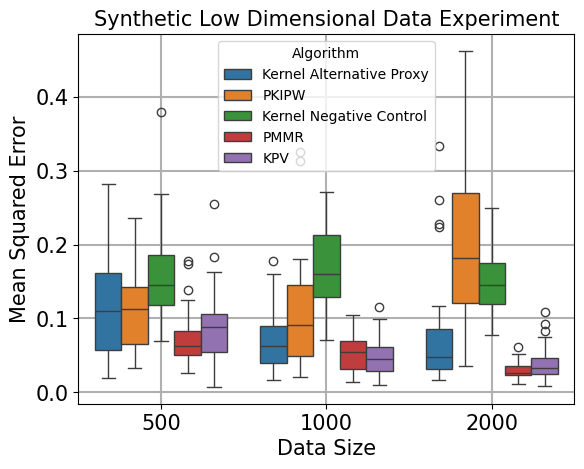

In [10]:
df_kernel_alternative_proxy_results = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy['scale_data'] == True) & (df_kernel_alternative_proxy['stage1_perc'] == 0.5) & (df_kernel_alternative_proxy['sigma_square'] == 1.)]
df_kernel_alternative_proxy_results_eta_learned = df_kernel_alternative_proxy_results.loc[df_kernel_alternative_proxy_results['eta_parameter'] == 'learned']
df_kernel_alternative_proxy_results_eta_learned['Algorithm'] = 'Kernel_Alternative_Proxy (learned eta)'
df_kernel_alternative_proxy_results_eta_fixed = df_kernel_alternative_proxy_results.loc[df_kernel_alternative_proxy_results['eta_parameter'] != 'learned']
df_kernel_alternative_proxy_results_eta_fixed['Algorithm'] = 'Kernel_Alternative_Proxy (fixed eta)'
df_PKIPW_results = df_PKIPW.loc[df_PKIPW['scale_data'] == True]
df_kernel_negative_control_results = df_kernel_negative_control.loc[df_kernel_negative_control['scale_data'] == True]
df_PMMR_results = df_PMMR.loc[df_PMMR['scale_data'] == True]
df_KPV_results = df_KPV.loc[df_KPV['scale_data'] == True]

df_kernel_alternative_proxy_results_eta_learned['Algorithm'] = 'Kernel Alternative Proxy'
df_kernel_negative_control_results['Algorithm'] = 'Kernel Negative Control'
df_results = pd.concat([df_kernel_alternative_proxy_results_eta_learned,
                        # df_kernel_alternative_proxy_results_eta_fixed,
                        df_PKIPW_results,
                        df_kernel_negative_control_results, 
                        df_PMMR_results,
                        df_KPV_results, 
                      ],
                      axis = 0)

SetPlotRC()
sns.boxplot(data=df_results[["Algorithm", "Data_Size", "Causal_MSE"]], x='Data_Size', y='Causal_MSE', hue='Algorithm')
plt.xlabel("Data Size", fontsize=10)
plt.ylabel("Mean Squared Error", fontsize=10)
plt.title("Synthetic Low Dimensional Data Experiment", fontsize=1)
plt.grid(linewidth=1.5)
ApplyFont(plt.gca(), xlabel_text_size = 15.0, ylabel_text_size = 15.0, title_text_size = 15.0, ticks_text_size = 15,)
plt.savefig('Figures/Alternative_Proxy_ATE_ComplexityRegularized_SyntheticLowD_Comparison.pdf', format='pdf', bbox_inches = 'tight')
plt.show()

In [11]:
df_kernel_alternative_proxy_results_eta_learned.shape, df_kernel_negative_control_results.shape, df_KPV_results.shape, df_PMMR_results.shape, df_PKIPW_results.shape

((90, 11), (90, 7), (90, 7), (90, 7), (90, 7))

# Without Data Scaling

In [12]:
# df_kernel_alternative_proxy_results = df_kernel_alternative_proxy.loc[(df_kernel_alternative_proxy['scale_data'] == False) & (df_kernel_alternative_proxy['stage1_perc'] == 0.5) & (df_kernel_alternative_proxy['length_scale_heuristic_quantile'] == 0.5)]
# df_kernel_alternative_proxy_results_eta_learned = df_kernel_alternative_proxy_results.loc[df_kernel_alternative_proxy_results['eta_parameter'] == 'learned']
# df_kernel_alternative_proxy_results_eta_learned['Algorithm'] = 'Kernel_Alternative_Proxy (learned eta)'
# df_kernel_alternative_proxy_results_eta_fixed = df_kernel_alternative_proxy_results.loc[df_kernel_alternative_proxy_results['eta_parameter'] != 'learned']
# df_kernel_alternative_proxy_results_eta_fixed['Algorithm'] = 'Kernel_Alternative_Proxy (fixed eta)'
# df_PKIPW_results = df_PKIPW.loc[df_PKIPW['scale_data'] == False]
# df_kernel_negative_control_results = df_kernel_negative_control.loc[df_kernel_negative_control['scale_data'] == False]
# df_PMMR_results = df_PMMR.loc[df_PMMR['scale_data'] == False]
# df_KPV_results = df_KPV.loc[df_KPV['scale_data'] == False]

# df_results = pd.concat([df_kernel_alternative_proxy_results_eta_learned,
#                         df_kernel_alternative_proxy_results_eta_fixed,
#                         df_PKIPW_results,
#                         df_kernel_negative_control_results, 
#                         df_PMMR_results,
#                         df_KPV_results, 
#                       ],
#                       axis = 0)

# SetPlotRC()
# sns.boxplot(data=df_results[["Algorithm", "Data_Size", "Causal_MSE"]], x='Data_Size', y='Causal_MSE', hue='Algorithm')
# plt.xlabel("Data Size", fontsize=10)
# plt.ylabel("Mean Squared Error", fontsize=10)
# plt.title("Synthetic Low Dimensional Data Experiment", fontsize=1)
# plt.grid(linewidth=1.5)
# ApplyFont(plt.gca(), xlabel_text_size = 15.0, ylabel_text_size = 15.0, title_text_size = 15.0, ticks_text_size = 15,)
# # plt.savefig('Figures/Alternative_Proxy_ATE_SyntheticLowD_Comparison_withoutNormalization.pdf', format='pdf', bbox_inches = 'tight')
# plt.show()